# <center>Bank Personal Loan Campaign </center>

### <b> Data Description: </b>
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### <b> Domain: </b>
Banking

### <b> Context: </b> 
This case is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Columns Description:

*	ID : Customer ID
*	Age : Customer's age in completed years
*	Experience : #years of professional experience
*	Income : Annual income of the customer (000)
*	ZIPCode : Home Address ZIP code
*	Family : Family size of the customer
*	CCAvg : Avg. spending on credit cards per month (000)
*	Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
*	Mortgage : Value of house mortgage if any. (000)
*	Personal Loan :	Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True
*	Securities Account : Does the customer have a securities account with the bank? 0 - False and 1 - True
*	CD Account : Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True
*	Online : Does the customer use internet banking facilities? 0 - False and 1 - True
*	CreditCard : Does the customer use a credit card issued by Universal Bank? 0 - False and 1 - True

### Objective: 
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### (1.) Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [11]:
# importing data

df = pd.read_csv(r"C:\Users\user\Desktop\Bank_Personal_Loan_Data.csv")

In [12]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [13]:
df.shape

(5000, 14)

In [195]:
df.info()        ## this would give datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [196]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
df.isnull().sum()  #check for null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### (2) EDA

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

In [16]:
df.nunique()
# gives number of unique values in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [17]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

# dropping 'ID' column as it all the unique value and this column wont provide any insight to build a model
# Zip Code represents region and region wise distribution of customers is not helping here
# as alot region are there in just 5000 customers, therefore dropping 'ZIP Code'

<b> Value Counts for Categorical Data

In [18]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


In [19]:
vc['Value_Count_0']=(vc['Value_Count_0']*100)/5000
vc['Value_Count_1']=(vc['Value_Count_1']*100)/5000
vc

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,9.60,90.40
1,Securities Account,10.44,89.56
2,CD Account,6.04,93.96
3,Online,59.68,40.32
4,CreditCard,29.40,70.60


In [20]:
df[df['Mortgage']==0].shape[0]

#count of people having home mortgage as zero, Most of the people donot have mortgage

3462

In [21]:
pd.crosstab(df['Personal Loan'], df['CreditCard'])

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


In [22]:
143/(1327+143)

0.09727891156462586

In [23]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='columns')

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


`When CreditCard value is 0 or 1 in both cases the distribution of target variable is same therefore dropping CreditCard`

In [24]:
df.drop('CreditCard',axis=1,inplace=True)

In [25]:
pd.crosstab(df['Personal Loan'], df['Education'],normalize='columns')

Education,1,2,3
Personal Loan,,,
0,0.95563,0.870278,0.863424
1,0.04437,0.129722,0.136576


In [27]:
pd.crosstab(df['Personal Loan'], df['Family'],normalize='columns')

Family,1,2,3,4
Personal Loan,,,,
0,0.92731,0.91821,0.868317,0.890344
1,0.07269,0.08179,0.131683,0.109656


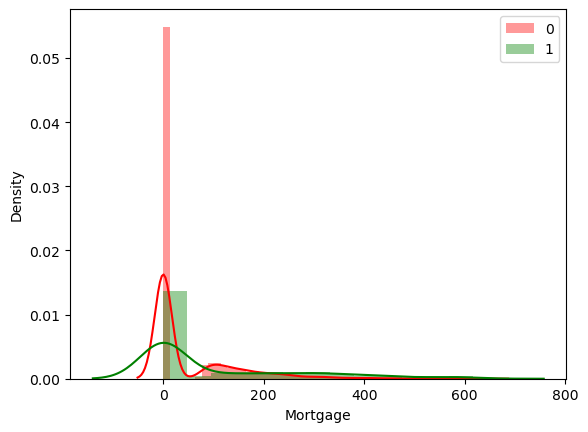

In [28]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

# Most people with zero motgage are not taking personal loans

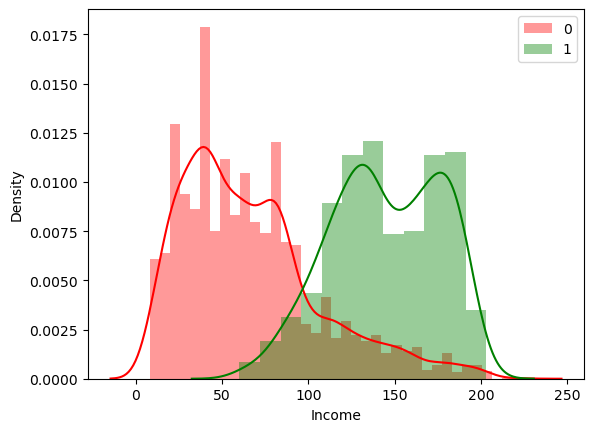

In [29]:
sns.distplot(df[df['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

In [212]:
# Number of People with high income taking personal loan are high as compared to low income

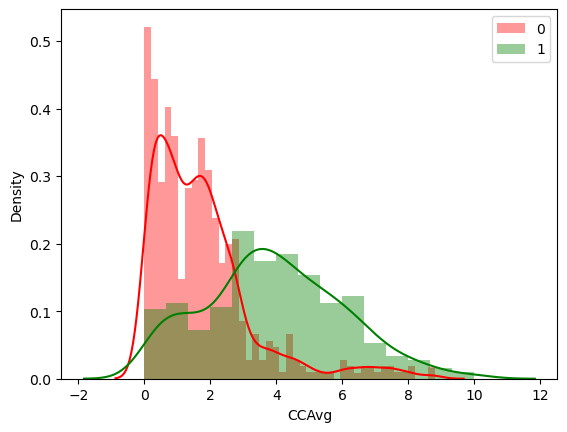

In [30]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show();

In [214]:
# People with high avg credit card spending per month are taking personal loans

In [31]:
df[df['CCAvg']==0].shape[0]

#count of people having zero monthly spending on credit card

106

In [32]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

In [33]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0


### (3) Split the data into training and test set in the ratio of 70:30 respectively

In [34]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

X = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [37]:
X = pd.get_dummies(X,drop_first=True)

In [38]:
X

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,1,0,0,0,0,1
4996,30,4,15,0.4,85,0,0,1,0,0,1,0,0
4997,63,39,24,0.3,0,0,0,0,1,0,0,0,1
4998,65,40,49,0.5,0,0,0,1,0,1,0,1,0


In [39]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [40]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,0,1,1,0


In [41]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [42]:
X_train.shape,X_test.shape

((3500, 13), (1500, 13))

In [43]:
X_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
2280,33,7,30,2.0,132,0,0,0,1,0,0,0,1
3944,56,26,62,1.4,0,0,0,1,0,1,0,0,1
1581,53,29,24,0.2,0,0,0,0,1,0,0,0,0
607,28,3,170,0.1,0,0,0,0,0,0,0,0,1
4121,53,27,65,2.8,0,0,0,0,0,0,1,1,0


### (4)  Training Logistic Regression model to predict the likelihood of a customer buying personal loans. Print all the metrics related for evaluating the model performance

In [44]:
## importing necessary metrics to evaluate model performance

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve

# Blanks list to store model name, training score, testing score, recall, precision and roc

algo= []
tr = []
te = []
recall = []
precision = []
roc = []

**Logistic Regression**

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7,)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [46]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [47]:
y_pred_class[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_pred_prob[:5,:]

array([[0.96520776, 0.03479224],
       [0.25356639, 0.74643361],
       [0.98355138, 0.01644862],
       [0.98166573, 0.01833427],
       [0.65661751, 0.34338249]])

<b> Confusion Matrix

In [57]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [67]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [235]:

# from sklearn.metrics import confusion_matrix


# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred_class)

# # Create a heatmap of the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.set(font_scale=1.2)  # Adjust font size for clarity
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted 0", "Predicted 1"],
#             yticklabels=["True 0", "True 1"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()


**Confusion matrix means**

* True Positive (observed=1,predicted=1): Predicted Personal loan will be taken and the customer took it

* False Positive (observed=0,predicted=1): Predicted Personal loan will be taken and the customer did not take it

* True Negative (observed=0,predicted=0): Predicted Personal loan will not be taken and the customer did not take it

* False Negative (observed=1,predicted=0): Predicted Personal loan will not be taken and the customer took it

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. less number of False Negative, so that bank doesn't lose real customers who want to take loan. Hence the focus should be on increasing Recall.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.

<b> ROC Curve

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

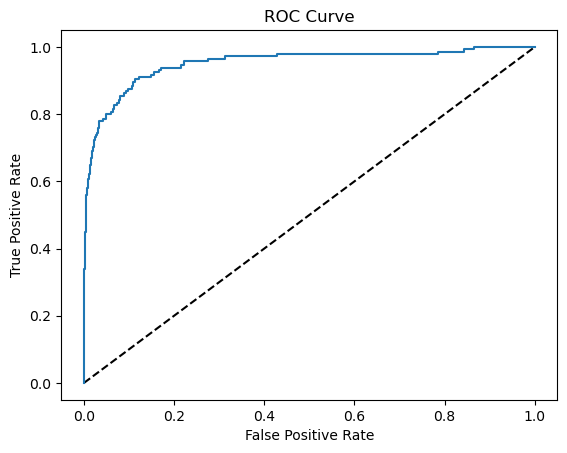

In [52]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [54]:
roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.998715
1,0.000000,0.006897,0.998715
2,0.000000,0.110345,0.987580
3,0.000738,0.110345,0.987429
4,0.000738,0.337931,0.916249
...,...,...,...
121,0.843542,0.986207,0.000311
122,0.843542,0.993103,0.000309
123,0.864207,0.993103,0.000254
124,0.864207,1.000000,0.000254


In [55]:
algo.append('Logistic Regression')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [56]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837


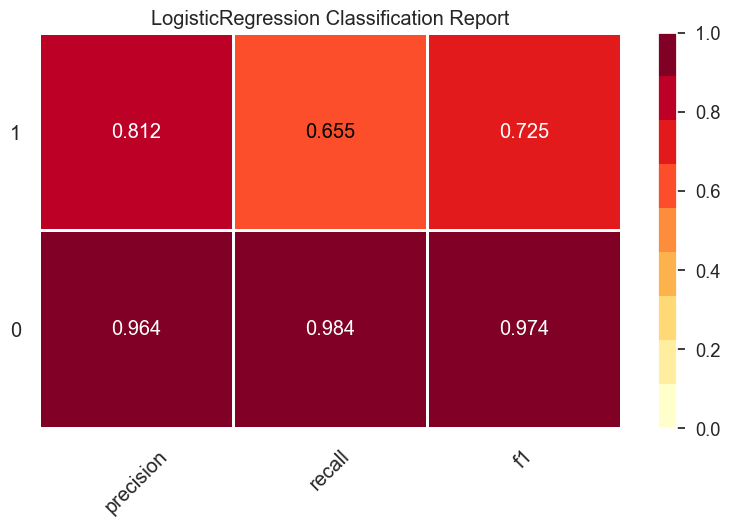

In [243]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# roc = ROCAUC(model)
# roc.fit(X_train, y_train)
# roc.score(X_test, y_test)
# roc.show();

### Reference Links & Addtional Material :

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<b>Please refer above link for the details of parameters</b>

* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

* https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

<b>Model Evaluation & Validation </b>

* https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
* https://medium.com/analytics-vidhya/a-simple-introduction-to-validating-and-testing-a-model-part-1-2a0765deb198

<b> Blogs on Same Data - </b>
* https://medium.com/@rohanaggarwal45/thera-bank-case-with-univariate-as-well-as-bivariate-analysis-all-the-machine-learning-models-7f61d04eaa2a

* https://www.kaggle.com/pritech/bank-personal-loan-modelling

In [83]:
# We apply L2 regularization
model_1 = LogisticRegression(penalty='l2',C=10,random_state=7,)
model_1.fit(X_train, y_train)

LogisticRegression(C=10, random_state=7)

In [84]:
y_pred_class=model_1.predict(X_test)
y_pred_prob=model_1.predict_proba(X_test)


In [85]:
y_pred_class[:5]


array([0, 1, 0, 0, 0], dtype=int64)

In [86]:
y_pred_prob[:5,:]

array([[0.9790439 , 0.0209561 ],
       [0.20160362, 0.79839638],
       [0.9907138 , 0.0092862 ],
       [0.98661214, 0.01338786],
       [0.63532582, 0.36467418]])

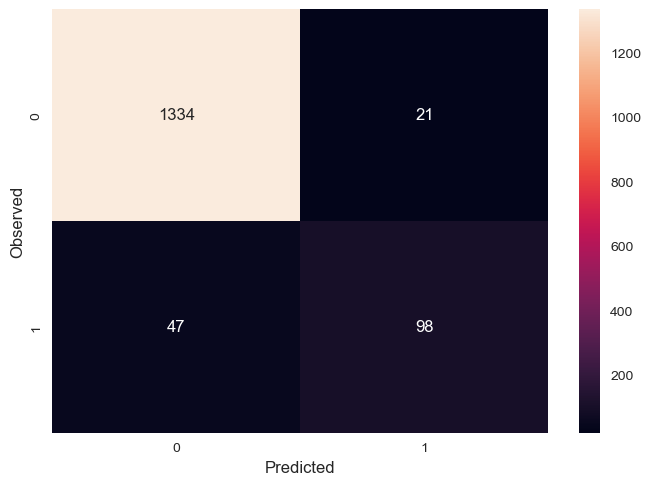

In [87]:
draw_cm(y_test,y_pred_class);

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

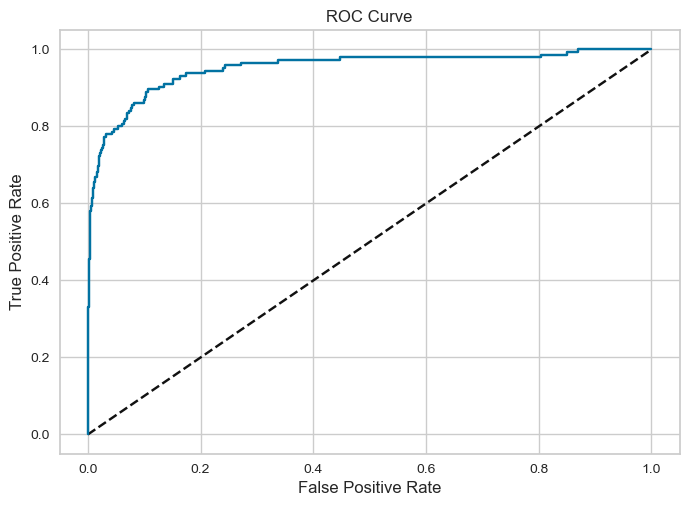

In [89]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [90]:

roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.999534
1,0.000000,0.006897,0.999534
2,0.000000,0.137931,0.992393
3,0.000738,0.137931,0.992292
4,0.000738,0.331034,0.954633
...,...,...,...
117,0.850185,0.986207,0.000131
118,0.850185,0.993103,0.000126
119,0.870111,0.993103,0.000101
120,0.870111,1.000000,0.000100


In [91]:
algo.append('Logistic Regression')
tr.append(model_1.score(X_train, y_train))
te.append(model_1.score(X_test, y_test))
recall.append(recall_score(y_test,model_1.predict(X_test)))
precision.append(precision_score(y_test,model_1.predict(X_test)))
roc.append(roc_auc_score(y_test,model_1.predict(X_test)))

In [93]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results


,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.959714,0.954667,0.675862,0.823529,0.830182


In [80]:
pip install yellowbrick


     ------------------------------------ 282.6/282.6 kB 528.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


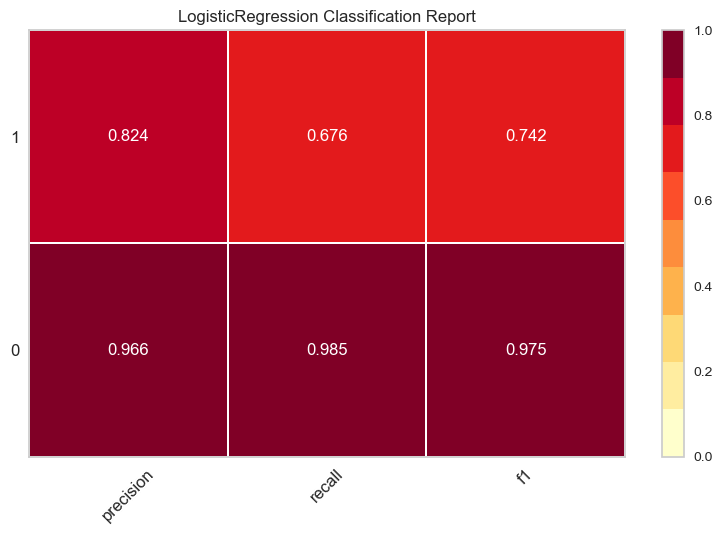

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [112]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_1)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Here also the recall is only 65%. So this model is also not giving a good result.

In [114]:
# L1 regularization

model_2= LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=7,)
model_2.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', random_state=7, solver='liblinear')

In [115]:
y_pred_class=model_2.predict(X_test)
y_pred_prob=model_2.predict_proba(X_test)

In [116]:
y_pred_class[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [117]:
y_pred_prob[:5,:]

array([[0.98840655, 0.01159345],
       [0.1379024 , 0.8620976 ],
       [0.98713042, 0.01286958],
       [0.99327427, 0.00672573],
       [0.62613922, 0.37386078]])

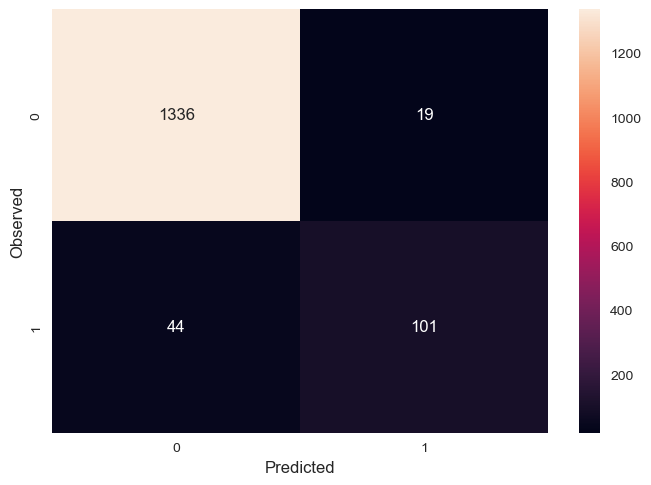

In [118]:
draw_cm(y_test,y_pred_class);

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

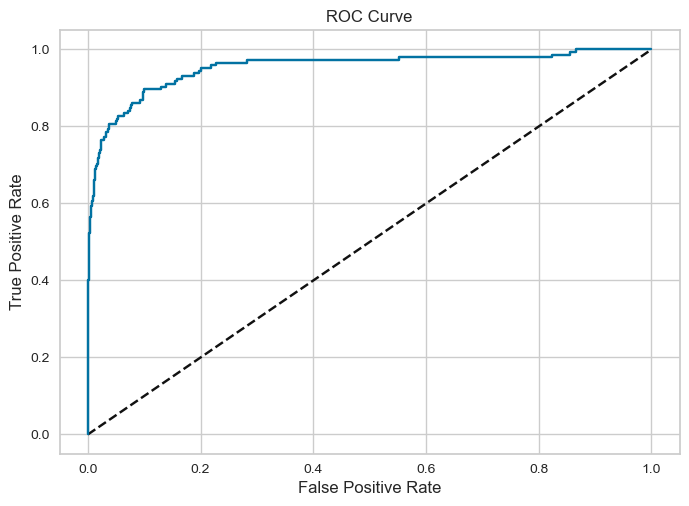

In [120]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [121]:
roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.999826
1,0.000000,0.006897,0.999826
2,0.000000,0.165517,0.992278
3,0.000738,0.165517,0.991976
4,0.000738,0.400000,0.928930
...,...,...,...
111,0.854613,0.986207,0.000099
112,0.854613,0.993103,0.000098
113,0.866421,0.993103,0.000087
114,0.866421,1.000000,0.000087


In [122]:
algo.append('Logistic Regression')
tr.append(model_2.score(X_train, y_train))
te.append(model_2.score(X_test, y_test))
recall.append(recall_score(y_test,model_2.predict(X_test)))
precision.append(precision_score(y_test,model_2.predict(X_test)))
roc.append(roc_auc_score(y_test,model_2.predict(X_test)))

In [123]:

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.959714,0.954667,0.675862,0.823529,0.830182
Logistic Regression,0.958857,0.958000,0.696552,0.841667,0.841265
Logistic Regression,0.958857,0.958000,0.696552,0.841667,0.841265


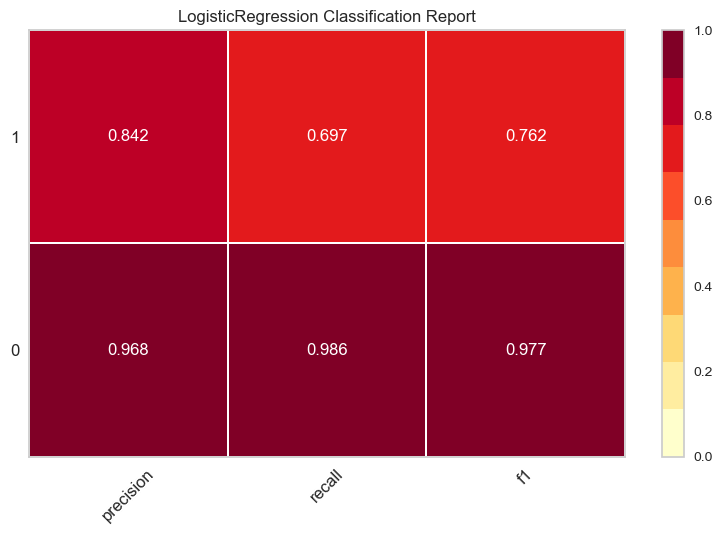

In [111]:
viz = ClassificationReport(model_2)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Here we get a better recall than l2 regularization

In [137]:
# Elasticnet regularization
model_3 = LogisticRegression(penalty='elasticnet',C=10,solver='saga',random_state=7,l1_ratio=0.1)
model_3.fit(X_train, y_train)

LogisticRegression(C=10, l1_ratio=0.1, penalty='elasticnet', random_state=7,
                   solver='saga')

In [138]:
y_pred_class=model_3.predict(X_test)
y_pred_prob=model_3.predict_proba(X_test)

In [139]:
y_pred_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [140]:

y_pred_prob[:5,:]

array([[0.64287306, 0.35712694],
       [0.61764837, 0.38235163],
       [0.76633888, 0.23366112],
       [0.96798367, 0.03201633],
       [0.84829969, 0.15170031]])

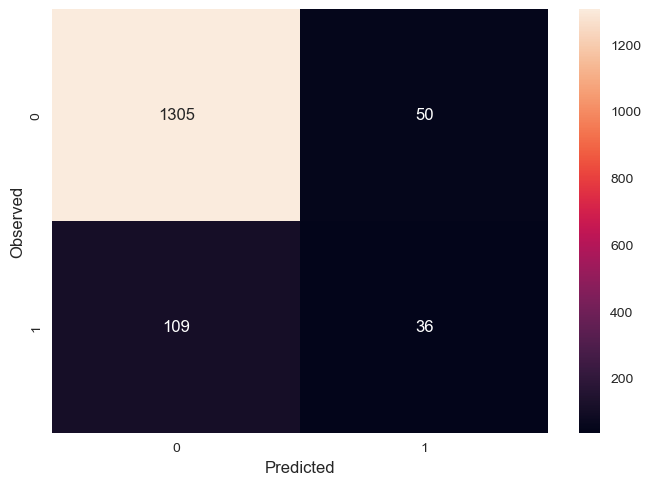

In [128]:
draw_cm(y_test,y_pred_class);

In [143]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

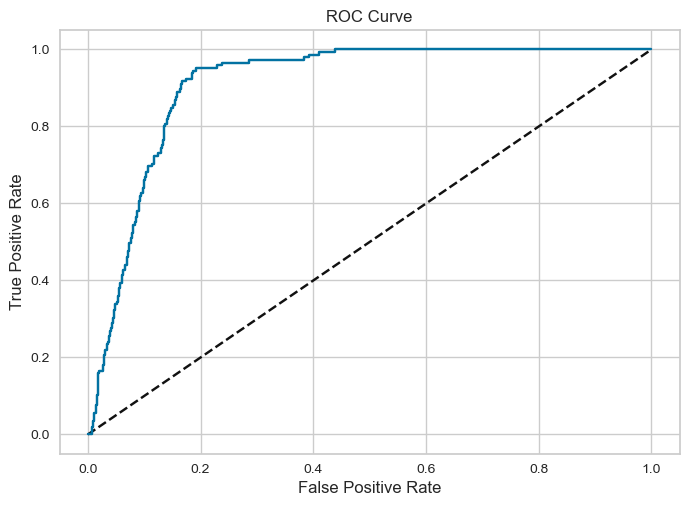

In [144]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [145]:

roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df


,fpr,tpr,thresholds
0,0.000000,0.000000,1.888836
1,0.000738,0.000000,0.888836
2,0.007380,0.000000,0.747820
3,0.007380,0.013793,0.719664
4,0.008118,0.013793,0.719560
...,...,...,...
212,0.636900,1.000000,0.014698
213,0.638376,1.000000,0.014691
214,0.830996,1.000000,0.008517
215,0.832472,1.000000,0.008506


In [146]:
algo.append('Logistic Regression')
tr.append(model_3.score(X_train, y_train))
te.append(model_3.score(X_test, y_test))
recall.append(recall_score(y_test,model_3.predict(X_test)))
precision.append(precision_score(y_test,model_3.predict(X_test)))
roc.append(roc_auc_score(y_test,model_3.predict(X_test)))

In [147]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results


,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.958571,0.952667,0.655172,0.818966,0.819837
Logistic Regression,0.959714,0.954667,0.675862,0.823529,0.830182
Logistic Regression,0.958857,0.958000,0.696552,0.841667,0.841265
Logistic Regression,0.958857,0.958000,0.696552,0.841667,0.841265
Logistic Regression,0.909714,0.894000,0.248276,0.418605,0.605688
Logistic Regression,0.909714,0.894000,0.248276,0.418605,0.605688


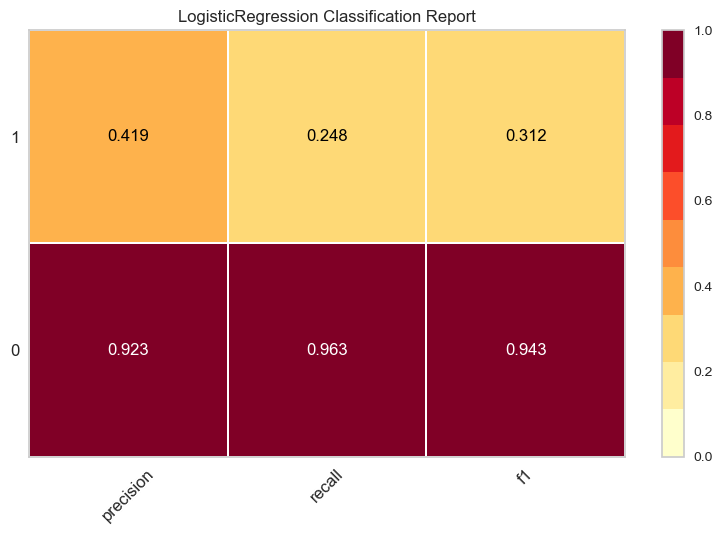

In [148]:


viz = ClassificationReport(model_3)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();